<span style="color:orange">Ejercicio_Despliegue de modelos de ML con Pycaret en Microsoft Azure </span>

## Parte I

## Instalando pycaret

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 8.6MB/s 
     |████████████████████████████████| 1.7MB 14.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 245kB 40.5MB/s 
     |████████████████████████████████| 276kB 47.5MB/s 
     |████████████████████████████████| 6.8MB 43.5MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 102kB 14.1MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 2.0MB 46.3MB/s 
     |████████████████████████████████| 14.2MB 299kB/s 
     |████████████████████████████████| 215kB 50.1MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 3.2MB 56.0MB/s 
     |████████████████████████████████| 1.1MB 40.7MB/s 
     |████████████████████████████████| 81kB 12.2MB

## Montaje del Gdrive

Necesitamos montar la unidad de Google para leer los datos en el entorno de colab. A continuación se muestra la forma más sencilla de montarlo. Se le pedirá que ingrese el token generado por su procedimiento de acceso.

Guardaremos los modelos localmente en Google Drive para este tutorial.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
## Crea un directorio para guardar los modelos

# Obteniendo los datos

In [ ]:
from pycaret.datasets import get_data
## Importa como dataset el conjunto de datos de "satellite" de Pycaret

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23,Attribute24,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
0,80,102,102,79,76,102,102,79,76,102,106,83,76,99,108,85,76,103,118,88,80,107,118,88,79,107,109,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,106,87,76,103,118,88,80,107,118,88,80,112,118,88,79,107,109,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,102,76,80,107,113,85,80,95,100,78,80,95,100,78,79,103,104,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,102,76,80,95,100,78,80,95,100,78,80,91,100,78,79,95,100,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,94,76,80,95,100,78,80,91,100,78,80,91,100,74,79,95,96,75,79,95,100,75,75,95,100,79,4


In [ ]:

dataset.shape

(6435, 37)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5792, 37)
Unseen Data For Predictions: (643, 37)


# Configuración del entorno en PyCaret
Generaremos el pipeline de preprocesamiento utilizando la funcion de setup de Pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
## Genera el pre-procesamiento para el conjunto de datos y balancea las clases

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5"
4,Original Data,"(5792, 37)"
5,Missing Values,False
6,Numeric Features,36
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## Parte II

In [ ]:
## Entrena diferentes modelos e identifica el mejor en base al Accuracy

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9196,0.9921,0.9012,0.9194,0.9186,0.9006,0.9009,2.379
rf,Random Forest Classifier,0.9129,0.9915,0.8934,0.9132,0.9120,0.8923,0.8928,1.613
et,Extra Trees Classifier,0.9112,0.9922,0.8904,0.9113,0.9102,0.8902,0.8907,0.865
gbc,Gradient Boosting Classifier,0.8991,0.9890,0.8825,0.9003,0.8988,0.8755,0.8759,16.243
knn,K Neighbors Classifier,0.8860,0.9735,0.8901,0.9050,0.8907,0.8605,0.8627,0.246
qda,Quadratic Discriminant Analysis,0.8522,0.9700,0.8070,0.8410,0.8416,0.8165,0.8181,0.130
dt,Decision Tree Classifier,0.8446,0.9067,0.8241,0.8499,0.8460,0.8085,0.8090,0.213
lda,Linear Discriminant Analysis,0.8338,0.9762,0.8087,0.8550,0.8411,0.7956,0.7970,0.144
nb,Naive Bayes,0.7874,0.9601,0.7805,0.8180,0.7964,0.7403,0.7430,0.122
lr,Logistic Regression,0.7792,0.9586,0.7550,0.7954,0.7849,0.7289,0.7301,2.789


In [ ]:
## Optimiza el mejor modelo del conjunto anterior

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9212,0.9911,0.9098,0.9231,0.9214,0.9028,0.9031
1,0.9039,0.9918,0.8743,0.9037,0.9028,0.8809,0.8814
2,0.9039,0.9908,0.8868,0.9031,0.9021,0.8815,0.8820
3,0.9064,0.9902,0.8890,0.9069,0.9052,0.8845,0.8850
4,0.9457,0.9965,0.9332,0.9450,0.9452,0.9329,0.9329
5,0.8914,0.9890,0.8719,0.8932,0.8910,0.8658,0.8665
6,0.9210,0.9933,0.9057,0.9202,0.9203,0.9023,0.9024
7,0.9136,0.9935,0.8995,0.9130,0.9127,0.8934,0.8936
8,0.9407,0.9929,0.9283,0.9409,0.9405,0.9268,0.9269
9,0.9185,0.9916,0.8990,0.9190,0.9183,0.8992,0.8993


## Evaluación del Modelo
A continuación se muestran los gráficos para ver los errores residuales del modelo.

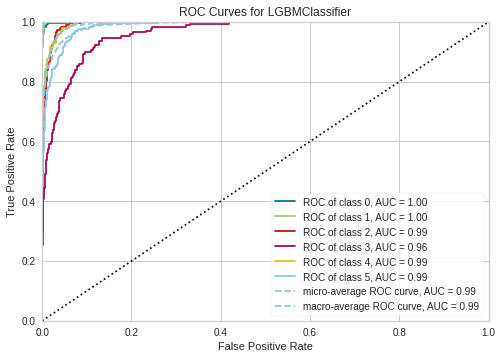

In [ ]:
## Obten la curva ROC para el modelo 

## Gráfica de error de predicción
Utilicemos el gráfico de los errores de predicción frente a los valores reales del objetivo.

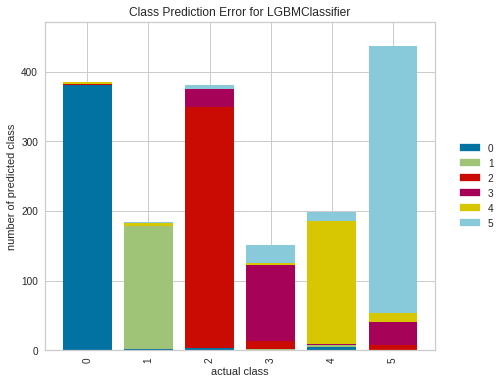

In [ ]:
## Utiliza el grafico de errores para identificar en que clases se equivoca el modelo

## Importancia de características
La importancia de la característica es un gráfico muy informativo para ver la contribución de cada característica en el modelo.

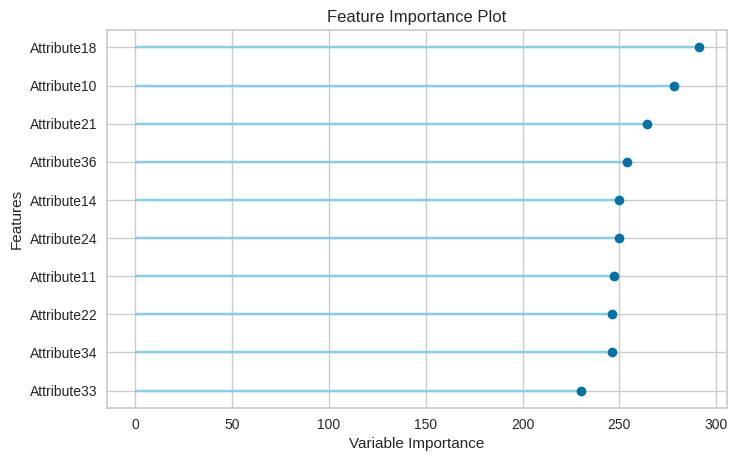

In [ ]:
## Analiza que caracteristicas son más importantes para el modelo

Otra forma de analizar el rendimiento de los modelos es usar la función `eval_model ()` que muestra una interfaz de usuario para todos los gráficos disponibles para un modelo dado. Utiliza internamente la función `plot_model ()`.

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predicción con datos de Test

In [ ]:
predict_model(tuned_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9056,0.9912,0.8865,0.9039,0.9045,0.8834,0.8835


## Finalizar el modelo para el despliegue en producción

In [ ]:
## Finaliza el modelo para el despliegue

In [ ]:

print(final_model)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9988,1.0,0.998,0.9989,0.9988,0.9986,0.9986


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23,Attribute24,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class,Label,Score
0,68.0,83.0,87.0,67.0,68.0,83.0,87.0,67.0,68.0,79.0,87.0,63.0,71.0,79.0,85.0,62.0,67.0,75.0,85.0,62.0,71.0,75.0,85.0,62.0,70.0,83.0,88.0,70.0,70.0,83.0,84.0,66.0,66.0,79.0,84.0,63.0,4,4,0.7548
1,64.0,69.0,71.0,57.0,64.0,69.0,71.0,54.0,64.0,69.0,67.0,54.0,64.0,71.0,71.0,56.0,60.0,71.0,75.0,56.0,64.0,71.0,75.0,56.0,67.0,68.0,70.0,54.0,67.0,68.0,70.0,54.0,67.0,72.0,74.0,54.0,7,7,0.9999
2,88.0,107.0,109.0,87.0,88.0,103.0,109.0,87.0,93.0,103.0,109.0,87.0,90.0,109.0,108.0,89.0,86.0,104.0,112.0,85.0,86.0,104.0,104.0,81.0,87.0,103.0,105.0,83.0,92.0,103.0,110.0,83.0,92.0,103.0,110.0,86.0,3,3,0.9978
3,52.0,79.0,100.0,78.0,56.0,83.0,96.0,85.0,56.0,83.0,108.0,85.0,49.0,73.0,90.0,75.0,56.0,81.0,93.0,83.0,56.0,88.0,101.0,83.0,50.0,84.0,93.0,76.0,53.0,88.0,97.0,80.0,57.0,88.0,105.0,87.0,1,1,0.9996
4,64.0,77.0,82.0,65.0,64.0,77.0,82.0,65.0,60.0,77.0,82.0,65.0,64.0,75.0,79.0,63.0,64.0,75.0,83.0,67.0,68.0,79.0,83.0,67.0,71.0,83.0,85.0,67.0,67.0,87.0,81.0,71.0,67.0,87.0,93.0,75.0,7,7,0.9781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,56.0,84.0,97.0,83.0,52.0,81.0,93.0,79.0,49.0,73.0,90.0,75.0,53.0,88.0,105.0,83.0,53.0,84.0,101.0,80.0,50.0,84.0,93.0,76.0,57.0,85.0,98.0,83.0,53.0,85.0,102.0,79.0,57.0,85.0,94.0,79.0,1,1,0.9997
1734,63.0,100.0,117.0,96.0,66.0,104.0,117.0,96.0,66.0,104.0,112.0,92.0,59.0,95.0,119.0,90.0,59.0,103.0,119.0,94.0,63.0,103.0,114.0,94.0,57.0,97.0,110.0,87.0,63.0,97.0,110.0,87.0,60.0,97.0,114.0,87.0,1,1,0.9998
1735,57.0,55.0,86.0,76.0,57.0,55.0,86.0,72.0,57.0,55.0,82.0,72.0,56.0,54.0,87.0,78.0,56.0,57.0,87.0,70.0,56.0,57.0,83.0,67.0,55.0,54.0,85.0,71.0,55.0,54.0,85.0,71.0,55.0,58.0,81.0,71.0,5,5,0.9996
1736,79.0,95.0,97.0,79.0,79.0,99.0,105.0,83.0,83.0,103.0,105.0,83.0,85.0,97.0,110.0,80.0,82.0,102.0,110.0,83.0,85.0,106.0,110.0,83.0,92.0,106.0,106.0,87.0,92.0,106.0,106.0,83.0,88.0,106.0,106.0,87.0,3,3,0.9689


## Predict on unseen data

In [ ]:
## Realiza una prediccion sobre el conjunto de datos "data_unseen"

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23,Attribute24,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class,Label,Score
0,49,71,88,78,49,71,88,74,49,67,88,70,49,73,86,79,49,73,93,79,52,77,93,75,50,75,89,76,50,79,89,76,50,79,93,76,1,1,0.9988
1,49,67,88,70,52,67,84,70,52,63,80,70,52,77,93,75,49,73,86,75,52,66,82,72,50,79,93,76,50,79,89,76,50,71,82,73,1,1,0.9985
2,52,67,84,70,52,63,80,70,49,63,76,66,49,73,86,75,52,66,82,72,52,70,82,72,50,79,89,76,50,71,82,73,47,67,82,65,1,1,0.9944
3,52,63,80,70,49,63,76,66,49,67,80,70,52,66,82,72,52,70,82,72,49,70,82,72,50,71,82,73,47,67,82,65,50,71,85,73,1,1,0.9768
4,49,63,76,66,49,67,80,70,52,71,80,74,52,70,82,72,49,70,82,72,52,73,82,75,47,67,82,65,50,71,85,73,53,75,89,73,1,1,0.9976


## Guardando el modelo
Primero guardemos el modelo localmente

In [ ]:
model_dir
model_name = 'Final_model'

In [ ]:
## Guarda el modelo en el directorio correcto

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1,

## Cargando el modelo guardado

In [ ]:
## Carga el modelo

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_model, data=data_unseen)

In [ ]:
new_prediction.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23,Attribute24,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class,Label,Score
0,49,71,88,78,49,71,88,74,49,67,88,70,49,73,86,79,49,73,93,79,52,77,93,75,50,75,89,76,50,79,89,76,50,79,93,76,1,1,0.9988
1,49,67,88,70,52,67,84,70,52,63,80,70,52,77,93,75,49,73,86,75,52,66,82,72,50,79,93,76,50,79,89,76,50,71,82,73,1,1,0.9985
2,52,67,84,70,52,63,80,70,49,63,76,66,49,73,86,75,52,66,82,72,52,70,82,72,50,79,89,76,50,71,82,73,47,67,82,65,1,1,0.9944
3,52,63,80,70,49,63,76,66,49,67,80,70,52,66,82,72,52,70,82,72,49,70,82,72,50,71,82,73,47,67,82,65,50,71,85,73,1,1,0.9768
4,49,63,76,66,49,67,80,70,52,71,80,74,52,70,82,72,49,70,82,72,52,73,82,75,47,67,82,65,50,71,85,73,53,75,89,73,1,1,0.9976


## Parte III

# Despliegue de modelos entrenados en Microsoft Azure



In [ ]:
import os, uuid
!pip install azure-storage-blob==12.3.1
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

     |████████████████████████████████| 286kB 9.5MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 3.2MB 15.1MB/s 
     |████████████████████████████████| 143kB 52.3MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 


In [ ]:

connect_str = 'DefaultEndpointsProtocol=https;AccountName=trial23;AccountKey=ghSdWJyw/jrwbj6WJo6E6liby1BGoW1XCKTiRDqPON6e7P+1hleAn2cJHCMDxdG6OcVMsWyj5C3H9Q76DjkrCA==;EndpointSuffix=core.windows.net' #@param {type:"string"}
print(connect_str)

DefaultEndpointsProtocol=https;AccountName=trial23;AccountKey=ghSdWJyw/jrwbj6WJo6E6liby1BGoW1XCKTiRDqPON6e7P+1hleAn2cJHCMDxdG6OcVMsWyj5C3H9Q76DjkrCA==;EndpointSuffix=core.windows.net


Para crear la conexión al contenedor de blobs, use el siguiente comando para crear un objeto de cliente de servicio.

In [ ]:

## Crea un BlobServiceClient para poder crear un contenedor de Azure


In [ ]:
def create_container(container_name):

  # Create the container
  container_client = blob_service_client.create_container(container_name)

  return container_client

def upload_blob(container_name, source_file_name, destination_blob_name):

  # Create a blob client using the local file name as the name for the blob
  blob_client = blob_service_client.get_blob_client(container=container_name, blob=destination_blob_name)

  print("\nUploading to Azure Storage as blob:\n\t" + source_file_name)

  # Upload the created file
  with open(source_file_name, "rb") as data:
      blob_client.upload_blob(data)

def download_blob(container_name, source_blob_name, destination_file_name):
  # Download the blob to a local file
  print("\nDownloading blob to \n\t" + destination_file_name)

  # Create a blob client using the local file name as the name for the blob
  blob_client = blob_service_client.get_blob_client(container=container_name, blob=source_blob_name)

  if destination_file_name is not None: 
        with open(destination_file_name, "wb") as download_file:
          download_file.write(blob_client.download_blob().readall())

        print(
            "Blob {} downloaded to {}.".format(
                source_blob_name, destination_file_name
            )
        )


## Guardar modelos en un contenedor de Azure



In [ ]:
## Crea un contenedor de Azure Blob Storage y guarda el modelo 


In [ ]:

## Sube el modelo al blob storage



Uploading to Azure Storage as blob:
	/content/drive/My Drive/azure_deploy_model/model-exercise-azure.pkl


## Descarga del modelo de Azure para predicciones



In [ ]:
print("\nListing blobs...")


blob_list = container_client.list_blobs()
for blob in blob_list:
    print("\t" + blob.name)

outfile_name = model_dir + 'model-exercise-azure-downloaded'
model_azure_src = str(model_name)+'.pkl'

## descarga el modelo del blob storage


Listing blobs...
	Final_model.pkl

	/content/drive/My Drive/azure_deploy_model/model-exercise-azure-downloaded.pkl
Blob Final_model.pkl downloaded to /content/drive/My Drive/azure_deploy_model/model-exercise-azure-downloaded.pkl.


Use el modelo descargado recientemente de Azure para realizar la predicción.

In [ ]:
## Carga el modelo para las predicciones

Transformation Pipeline and Model Successfully Loaded


In [ ]:
## Realiza una prediccion con el modelo descargado del blob con los datos de "data_unseen"


In [ ]:
new_prediction_azure.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23,Attribute24,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class,Label,Score
0,49,71,88,78,49,71,88,74,49,67,88,70,49,73,86,79,49,73,93,79,52,77,93,75,50,75,89,76,50,79,89,76,50,79,93,76,1,1,0.9988
1,49,67,88,70,52,67,84,70,52,63,80,70,52,77,93,75,49,73,86,75,52,66,82,72,50,79,93,76,50,79,89,76,50,71,82,73,1,1,0.9985
2,52,67,84,70,52,63,80,70,49,63,76,66,49,73,86,75,52,66,82,72,52,70,82,72,50,79,89,76,50,71,82,73,47,67,82,65,1,1,0.9944
3,52,63,80,70,49,63,76,66,49,67,80,70,52,66,82,72,52,70,82,72,49,70,82,72,50,71,82,73,47,67,82,65,50,71,85,73,1,1,0.9768
4,49,63,76,66,49,67,80,70,52,71,80,74,52,70,82,72,49,70,82,72,52,73,82,75,47,67,82,65,50,71,85,73,53,75,89,73,1,1,0.9976
